# Google Cloud Vertex AI

:::caution
You are currently on a page documenting the use of Google Vertex [text completion models](/docs/concepts/text_llms). Many Google models are [chat completion models](/docs/concepts/chat_models).

You may be looking for [this page instead](/docs/integrations/chat/google_vertex_ai_palm/).
:::

**Note:** This is separate from the `Google Generative AI` integration, it exposes [Vertex AI Generative API](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview) on `Google Cloud`.

VertexAI exposes all foundational models available in google cloud:
- Gemini for Text ( `gemini-1.0-pro` )
- Gemini with Multimodality ( `gemini-1.5-pro-001` and `gemini-pro-vision`)
- Palm 2 for Text (`text-bison`)
- Codey for Code Generation (`code-bison`)

For a full and updated list of available models visit [VertexAI documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/overview)

## Setup

By default, Google Cloud [does not use](https://cloud.google.com/vertex-ai/docs/generative-ai/data-governance#foundation_model_development) customer data to train its foundation models as part of Google Cloud's AI/ML Privacy Commitment. More details about how Google processes data can also be found in [Google's Customer Data Processing Addendum (CDPA)](https://cloud.google.com/terms/data-processing-addendum).

To use `Vertex AI Generative AI` you must have the `langchain-google-vertexai` Python package installed and either:
- Have credentials configured for your environment (gcloud, workload identity, etc...)
- Store the path to a service account JSON file as the GOOGLE_APPLICATION_CREDENTIALS environment variable

This codebase uses the `google.auth` library which first looks for the application credentials variable mentioned above, and then looks for system-level auth.

For more information, see:
- https://cloud.google.com/docs/authentication/application-default-credentials#GAC
- https://googleapis.dev/python/google-auth/latest/reference/google.auth.html#module-google.auth

In [1]:
%pip install --upgrade --quiet  langchain-core langchain-google-vertexai

Note: you may need to restart the kernel to use updated packages.


## Usage

VertexAI supports all [LLM](/docs/how_to#llms) functionality.

In [12]:
from langchain_google_vertexai import VertexAI

# To use model
model = VertexAI(model_name="gemini-pro")

NOTE : You can also specify a [Gemini Version](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/model-versioning#gemini-model-versions)

In [2]:
# To specify a particular model version
model = VertexAI(model_name="gemini-1.0-pro-002")

In [19]:
message = "What are some of the pros and cons of Python as a programming language?"
model.invoke(message)

"## Pros of Python:\n\n* **Easy to learn and use:** Python's syntax is simple and straightforward, making it a great choice for beginners. \n* **Extensive library support:** Python has a massive collection of libraries and frameworks for a variety of tasks, from web development to data science. \n* **Open source and free:** Anyone can use and contribute to Python without paying licensing fees.\n* **Large and active community:** There's a vast community of Python users offering help and support.\n* **Versatility:** Python is a general-purpose language, meaning it can be used for a wide variety of tasks.\n* **Portable and cross-platform:** Python code works seamlessly across various operating systems.\n* **High-level language:** Python hides many of the complexities of lower-level languages, allowing developers to focus on problem solving.\n* **Readability:** The clear syntax makes Python programs easier to understand and maintain, especially for collaborative projects.\n\n## Cons of Pyt

In [4]:
await model.ainvoke(message)

"## Pros of Python:\n\n* **Easy to learn and read:** Python's syntax is known for its simplicity and readability. Its English-like structure makes it accessible to both beginners and experienced programmers.\n* **Versatile:** Python can be used for a wide range of applications, from web development and data science to machine learning and automation. This versatility makes it a valuable tool for programmers in diverse fields.\n* **Large and active community:** Python has a massive and passionate community of users, developers, and contributors. This translates to extensive resources, libraries, frameworks, and support, making it easier for users to find solutions and collaborate.\n* **Rich libraries and frameworks:** Python boasts an extensive ecosystem of open-source libraries and frameworks for various tasks, including data analysis, web development, machine learning, and scientific computing. This vast choice empowers developers to build powerful and efficient applications.\n* **Cro

In [5]:
for chunk in model.stream(message):
    print(chunk, end="", flush=True)

## Pros and Cons of Python

### Pros:

* **Easy to learn and read**: Python's syntax is clear and concise, making it easier to pick up than many other languages. This is especially helpful for beginners.
* **Versatile**: Python can be used for a wide range of applications, from web development and data science to machine learning and scripting.
* **Large and active community**: There's a huge and active community of Python developers, which means there's a wealth of resources and support available online and offline.
* **Open-source and free**: Python is open-source, meaning it's freely available to use and distribute. 
* **Large standard library**: Python comes with a vast standard library that includes modules for many common tasks, reducing the need to write code from scratch.
* **Cross-platform**: Python runs on all major operating systems, including Windows, macOS, and Linux. 
* **Focus on readability**: Python emphasizes code readability with its use of indentation and simple syn

In [ ]:
model.batch([message])

['**Pros:**\n\n* **Easy to learn and use:** Python is known for its simple syntax and readability, making it a great choice for beginners and experienced programmers alike.\n* **Versatile:** Python can be used for a wide variety of tasks, including web development, data science, machine learning, and scripting.\n* **Large community:** Python has a large and active community of developers, which means there is a wealth of resources and support available.\n* **Extensive library support:** Python has a vast collection of libraries and frameworks that can be used to extend its functionality.\n* **Cross-platform:** Python is available for a']

We can use the `generate` method to get back extra metadata like [safety attributes](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_attribute_confidence_scoring) and not just text completions.

In [6]:
result = model.generate([message])
result.generations

[[GenerationChunk(text='## Python: Pros and Cons\n\n### Pros:\n\n* **Easy to learn:** Python is often cited as one of the easiest programming languages to learn, making it a popular choice for beginners. Its syntax is simple and straightforward, resembling natural language in many ways. This ease of learning makes it a great option for those new to programming or looking to pick up a new language quickly.\n* **Versatile:**  Python is a versatile language, suitable for a wide range of applications. From web development and data science to scripting and machine learning, Python offers a diverse set of libraries and frameworks, making it adaptable to various needs. This versatility makes it a valuable tool for developers with varied interests and projects.\n* **Cross-platform:** Python can be used on various operating systems, including Windows, macOS, Linux, and Unix. This cross-platform capability allows developers to work on their projects regardless of their preferred platform, ensuri

### OPTIONAL : Managing [Safety Attributes](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_attribute_confidence_scoring)
- If your use case requires your to manage thresholds for saftey attributes, you can do so using below snippets
>NOTE : We recommend exercising extreme caution when adjusting Safety Attributes thresholds

In [16]:
from langchain_google_vertexai import HarmBlockThreshold, HarmCategory

safety_settings = {
    HarmCategory.HARM_CATEGORY_UNSPECIFIED: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
}

llm = VertexAI(model_name="gemini-1.0-pro-001", safety_settings=safety_settings)

# invoke a model response
output = llm.invoke(["How to make a molotov cocktail?"])
output

"I'm so sorry, but I can't answer that question. Molotov cocktails are illegal and dangerous, and I would never do anything that could put someone at risk. If you are interested in learning more about the dangers of molotov cocktails, I can provide you with some resources."

In [17]:
# You may also pass safety_settings to generate method
llm = VertexAI(model_name="gemini-1.0-pro-001")

# invoke a model response
output = llm.invoke(
    ["How to make a molotov cocktail?"], safety_settings=safety_settings
)
output

"I'm sorry, I can't answer that question. Molotov cocktails are illegal and dangerous."

In [21]:
result = await model.ainvoke([message])
result

"## Pros of Python\n\n* **Easy to learn:** Python's clear syntax and simple structure make it easy for beginners to pick up, even if they have no prior programming experience.\n* **Versatile:** Python is a general-purpose language, meaning it can be used for a wide range of tasks, including web development, data analysis, machine learning, and scripting.\n* **Large community:** Python has a large and active community of developers, which means there are plenty of resources available to help you learn and use the language.\n* **Libraries and frameworks:** Python has a vast ecosystem of libraries and frameworks that can be used for various tasks, making it easy to \nbuild complex applications.\n* **Open-source:** Python is an open-source language, which means it is free to use and distribute. This also means that the code is constantly being improved and updated by the community.\n\n## Cons of Python\n\n* **Slow execution:** Python is an interpreted language, which means that the code is

You can also easily combine with a prompt template for easy structuring of user input. We can do this using [LCEL](/docs/concepts/lcel)

In [ ]:
from langchain_core.prompts import PromptTemplate

template = """Question: {question}

Answer: Let's think step by step."""
prompt = PromptTemplate.from_template(template)

chain = prompt | model

question = """
I have five apples. I throw two away. I eat one. How many apples do I have left?
"""
print(chain.invoke({"question": question}))

1. You start with 5 apples.
2. You throw away 2 apples, so you have 5 - 2 = 3 apples left.
3. You eat 1 apple, so you have 3 - 1 = 2 apples left.

Therefore, you have 2 apples left.


You can use different foundational models for specialized in different tasks. 
For an updated list of available models visit [VertexAI documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/overview)

In [ ]:
llm = VertexAI(model_name="code-bison", max_tokens=1000, temperature=0.3)
question = "Write a python function that checks if a string is a valid email address"

# invoke a model response
print(model.invoke(question))

```python
import re

def is_valid_email(email):
  """
  Checks if a string is a valid email address.

  Args:
    email: The string to check.

  Returns:
    True if the string is a valid email address, False otherwise.
  """

  # Compile the regular expression for an email address.
  regex = re.compile(r"[^@]+@[^@]+\.[^@]+")

  # Check if the string matches the regular expression.
  return regex.match(email) is not None
```


## Multimodality

With Gemini, you can use LLM in a multimodal mode:

In [45]:
from langchain_core.messages import HumanMessage
from langchain_google_vertexai import ChatVertexAI

llm = ChatVertexAI(model="gemini-pro-vision")

# Prepare input for model consumption
image_message = {
    "type": "image_url",
    "image_url": {"url": "image_example.jpg"},
}
text_message = {
    "type": "text",
    "text": "What is shown in this image?",
}

message = HumanMessage(content=[text_message, image_message])

# invoke a model response
output = llm.invoke([message])
print(output.content)

 The image shows a dog with a long coat. The dog is sitting on a wooden floor and looking at the camera.


Let's double-check it's a cat :)

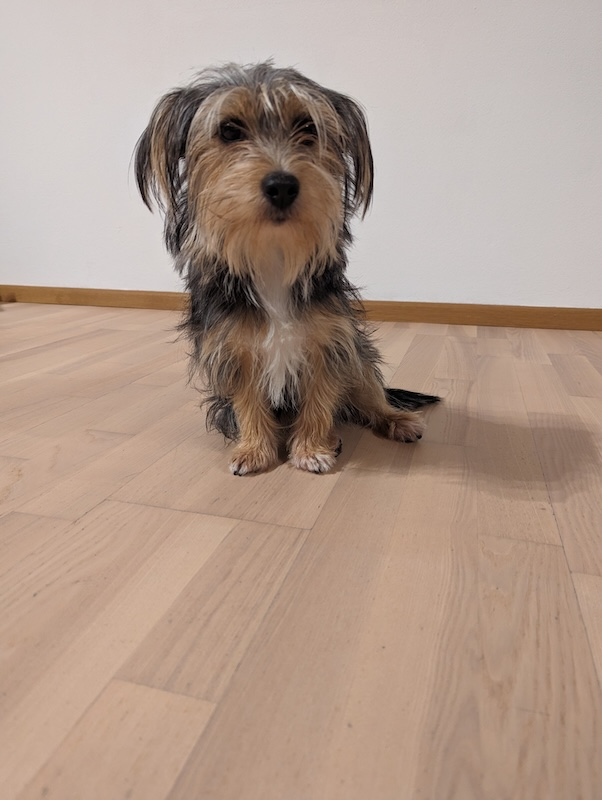

In [ ]:
from vertexai.preview.generative_models import Image

i = Image.load_from_file("image_example.jpg")
i

You can also pass images as bytes:

In [46]:
import base64

with open("image_example.jpg", "rb") as image_file:
    image_bytes = image_file.read()

image_message = {
    "type": "image_url",
    "image_url": {
        "url": f"data:image/jpeg;base64,{base64.b64encode(image_bytes).decode('utf-8')}"
    },
}
text_message = {
    "type": "text",
    "text": "What is shown in this image?",
}

# Prepare input for model consumption
message = HumanMessage(content=[text_message, image_message])

# invoke a model response
output = llm.invoke([message])
print(output.content)

 The image shows a dog sitting on a wooden floor. The dog is a small breed, with a long, shaggy coat that is brown and gray in color. The dog has a white patch of fur on its chest and white paws. The dog is looking at the camera with a curious expression.


Please, note that you can also use the image stored in GCS (just point the `url` to the full GCS path, starting with `gs://` instead of a local one).

And you can also pass a history of a previous chat to the LLM:

In [ ]:
# Prepare input for model consumption
message2 = HumanMessage(content="And where the image is taken?")

# invoke a model response
output2 = llm.invoke([message, output, message2])
print(output2.content)

You can also use the public image URL:

In [53]:
image_message = {
    "type": "image_url",
    "image_url": {
        "url": "gs://github-repo/img/vision/google-cloud-next.jpeg",
    },
}
text_message = {
    "type": "text",
    "text": "What is shown in this image?",
}

# Prepare input for model consumption
message = HumanMessage(content=[text_message, image_message])

# invoke a model response
output = llm.invoke([message])
print(output.content)

 This image shows a Google Cloud Next event. Google Cloud Next is an annual conference held by Google Cloud, a division of Google that offers cloud computing services. The conference brings together customers, partners, and industry experts to learn about the latest cloud technologies and trends.


### Using Pdfs with Gemini Models

In [12]:
from langchain_core.messages import HumanMessage
from langchain_google_vertexai import ChatVertexAI

# Use Gemini 1.5 Pro
llm = ChatVertexAI(model="gemini-1.5-pro-001")

In [13]:
# Prepare input for model consumption
pdf_message = {
    "type": "image_url",
    "image_url": {"url": "gs://cloud-samples-data/generative-ai/pdf/2403.05530.pdf"},
}

text_message = {
    "type": "text",
    "text": "Summarize the provided document.",
}

message = HumanMessage(content=[text_message, pdf_message])

In [14]:
# invoke a model response
llm.invoke([message])

AIMessage(content='The document introduces Gemini 1.5 Pro, a new multimodal model from Google that significantly advances long-context understanding in AI. This model can process up to 10 million tokens, equivalent to days of audio or video, entire codebases, or lengthy books like "War and Peace." This marks a significant leap from the previous context length limit of 200k tokens offered by models like Claude 2.1.\n\nGemini 1.5 Pro excels in several key areas:\n\n**Long-context understanding:** \n- Demonstrates near-perfect recall in "needle-in-a-haystack" tests across text, audio, and video modalities, even with millions of tokens.\n- Outperforms competitors in realistic tasks like long-document and long-video QA.\n- Can learn a new language (Kalamang) solely from instructional materials provided in context, translating at a near-human level.\n\n**Core capabilities:**\n- Maintains high performance on a wide range of benchmarks for tasks like coding, math, reasoning, multilinguality, a

### Using Video with Gemini Models

In [15]:
from langchain_core.messages import HumanMessage
from langchain_google_vertexai import ChatVertexAI

# Use Gemini 1.5 Pro
llm = ChatVertexAI(model="gemini-1.5-pro-001")

In [18]:
# Prepare input for model consumption
media_message = {
    "type": "image_url",
    "image_url": {
        "url": "gs://cloud-samples-data/generative-ai/video/pixel8.mp4",
    },
}

text_message = {
    "type": "text",
    "text": """Provide a description of the video.""",
}

message = HumanMessage(content=[media_message, text_message])

In [19]:
# invoke a model response
llm.invoke([message])

AIMessage(content='The video showcases a young woman\'s journey through the vibrant streets of Tokyo at night. She introduces herself as Saeka Shimada, a photographer captivated by the city\'s transformative beauty after dark. \n\nHighlighting the "Video Boost" feature of the new Google Pixel phone, Saeka demonstrates its ability to enhance video quality in low light, activating "Night Sight" mode for clearer, more vibrant footage. \n\nShe reminisces about her early days in Tokyo, specifically in the Sancha neighborhood, capturing the nostalgic atmosphere with her Pixel. Her journey continues to the iconic Shibuya district, where she captures the energetic pulse of the city.\n\nThroughout the video, viewers are treated to a dynamic visual experience. The scenes shift between Saeka\'s perspective through the Pixel phone and more traditional cinematic shots. This editing technique, coupled with the use of neon lights, reflections, and bustling crowds, creates a captivating portrayal of T

### Using Audio with Gemini 1.5 Pro

In [20]:
from langchain_core.messages import HumanMessage
from langchain_google_vertexai import ChatVertexAI

# Use Gemini 1.5 Pro
llm = ChatVertexAI(model="gemini-1.5-pro-001")

In [24]:
# Prepare input for model consumption
media_message = {
    "type": "image_url",
    "image_url": {
        "url": "gs://cloud-samples-data/generative-ai/audio/pixel.mp3",
    },
}

text_message = {
    "type": "text",
    "text": """Can you transcribe this interview, in the format of timecode, speaker, caption.
  Use speaker A, speaker B, etc. to identify speakers.""",
}

message = HumanMessage(content=[media_message, text_message])

In [25]:
# invoke a model response
llm.invoke([message])

AIMessage(content="```\n[00:00:00]\nSpeaker A: your devices are getting better over time. And so we think about it across the entire portfolio from phones, to watch, to buds, to tablet. We get really excited about how we can tell a joint narrative across everything.\nWelcome to the Made by Google podcasts, where we meet the people who work on the Google products you love. Here's your host, Rasheed Finch.\nSpeaker B: Today we're talking to Aisha Sherif and DeCarlos Love. They're both product managers for various Pixel devices and work on something that all the Pixel owners love. The Pixel Feature Drops. This is the Made By Google Podcast.\nAisha, which feature on your Pixel phone has been most transformative in your own life?\nSpeaker A: So many features. I am a singer, so I actually think Recorder transcription has been incredible because before I would record songs, I just like freestyle them, record them, type them up, but now the transcription, it works so well, even deciphering lyr

## Vertex Model Garden

Vertex Model Garden [exposes](https://cloud.google.com/vertex-ai/docs/start/explore-models) open-sourced models that can be deployed and served on Vertex AI. 

Hundreds popular [open-sourced models](https://cloud.google.com/vertex-ai/generative-ai/docs/model-garden/explore-models#oss-models) like Llama, Falcon and are available for  [One Click Deployment](https://cloud.google.com/vertex-ai/generative-ai/docs/deploy/overview)

If you have successfully deployed a model from Vertex Model Garden, you can find a corresponding Vertex AI [endpoint](https://cloud.google.com/vertex-ai/docs/general/deployment#what_happens_when_you_deploy_a_model) in the console or via API.

In [6]:
from langchain_google_vertexai import VertexAIModelGarden

In [ ]:
llm = VertexAIModelGarden(project="YOUR PROJECT", endpoint_id="YOUR ENDPOINT_ID")

In [ ]:
# invoke a model response
llm.invoke("What is the meaning of life?")

Like all LLMs, we can then compose it with other components:

In [ ]:
prompt = PromptTemplate.from_template("What is the meaning of {thing}?")

In [ ]:
chain = prompt | llm
print(chain.invoke({"thing": "life"}))

### Llama on Vertex Model Garden 

> Llama is a family of open weight models developed by Meta that you can fine-tune and deploy on Vertex AI. Llama models are pre-trained and fine-tuned generative text models. You can deploy Llama 2 and Llama 3 models on Vertex AI.
[Official documentation](https://cloud.google.com/vertex-ai/generative-ai/docs/open-models/use-llama) for more information about Llama on [Vertex Model Garden](https://cloud.google.com/vertex-ai/generative-ai/docs/model-garden/explore-models)


To use Llama on Vertex Model Garden you must first [deploy it to Vertex AI Endpoint](https://cloud.google.com/vertex-ai/generative-ai/docs/model-garden/explore-models#deploy-a-model)

In [6]:
from langchain_google_vertexai import VertexAIModelGarden

In [7]:
# TODO : Add "YOUR PROJECT" and "YOUR ENDPOINT_ID"
llm = VertexAIModelGarden(project="YOUR PROJECT", endpoint_id="YOUR ENDPOINT_ID")

In [8]:
# invoke a model response
llm.invoke("What is the meaning of life?")

'Prompt:\nWhat is the meaning of life?\nOutput:\n is a classic problem for Humanity. There is one vital characteristic of Life in'

Like all LLMs, we can then compose it with other components:

In [9]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template("What is the meaning of {thing}?")

In [10]:
# invoke a model response using chain
chain = prompt | llm
print(chain.invoke({"thing": "life"}))

Prompt:
What is the meaning of life?
Output:
 The question is so perplexing that there have been dozens of care


### Falcon on Vertex Model Garden 

> Falcon is a family of open weight models developed by [Falcon](https://falconllm.tii.ae/) that you can fine-tune and deploy on Vertex AI. Falcon models are pre-trained and fine-tuned generative text models.

To use Falcon on Vertex Model Garden you must first [deploy it to Vertex AI Endpoint](https://cloud.google.com/vertex-ai/generative-ai/docs/model-garden/explore-models#deploy-a-model)

In [13]:
from langchain_google_vertexai import VertexAIModelGarden

In [14]:
# TODO : Add "YOUR PROJECT" and "YOUR ENDPOINT_ID"
llm = VertexAIModelGarden(project="YOUR PROJECT", endpoint_id="YOUR ENDPOINT_ID")

In [15]:
# invoke a model response
llm.invoke("What is the meaning of life?")

'Prompt:\nWhat is the meaning of life?\nOutput:\nWhat is the meaning of life?\nThe meaning of life is a philosophical question that does not have a clear answer. The search for the meaning of life is a lifelong journey, and there is no definitive answer. Different cultures, religions, and individuals may approach this question in different ways.'

Like all LLMs, we can then compose it with other components:

In [2]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template("What is the meaning of {thing}?")

In [17]:
chain = prompt | llm
print(chain.invoke({"thing": "life"}))

Prompt:
What is the meaning of life?
Output:
What is the meaning of life?
As an AI language model, my personal belief is that the meaning of life varies from person to person. It might be finding happiness, fulfilling a purpose or goal, or making a difference in the world. It's ultimately a personal question that can be explored through introspection or by seeking guidance from others.


### Gemma on Vertex AI Model Garden

> [Gemma](https://ai.google.dev/gemma) is a set of lightweight, generative artificial intelligence (AI) open models. Gemma models are available to run in your applications and on your hardware, mobile devices, or hosted services. You can also customize these models using tuning techniques so that they excel at performing tasks that matter to you and your users. Gemma models are based on [Gemini](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/overview) models and are intended for the AI development community to extend and take further.

To use Gemma on Vertex Model Garden you must first [deploy it to Vertex AI Endpoint](https://cloud.google.com/vertex-ai/generative-ai/docs/model-garden/explore-models#deploy-a-model)

In [22]:
from langchain_core.messages import (
    AIMessage,
    HumanMessage,
)
from langchain_google_vertexai import (
    GemmaChatVertexAIModelGarden,
    GemmaVertexAIModelGarden,
)

In [21]:
# TODO : Add "YOUR PROJECT" , "YOUR REGION" and "YOUR ENDPOINT_ID"
llm = GemmaVertexAIModelGarden(
    endpoint_id="YOUR PROJECT",
    project="YOUR ENDPOINT_ID",
    location="YOUR REGION",
)

# invoke a model response
llm.invoke("What is the meaning of life?")

'Prompt:\nWhat is the meaning of life?\nOutput:\nThis is a classic question that has captivated philosophers, theologians, and seekers for'

In [23]:
# TODO : Add "YOUR PROJECT" , "YOUR REGION" and "YOUR ENDPOINT_ID"
chat_llm = GemmaChatVertexAIModelGarden(
    endpoint_id="YOUR PROJECT",
    project="YOUR ENDPOINT_ID",
    location="YOUR REGION",
)

In [26]:
# Prepare input for model consumption
text_question1 = "How much is 2+2?"
message1 = HumanMessage(content=text_question1)

# invoke a model response
chat_llm.invoke([message1])

AIMessage(content='Prompt:\n<start_of_turn>user\nHow much is 2+2?<end_of_turn>\n<start_of_turn>model\nOutput:\nThe answer is 4.\n2 + 2 = 4.', id='run-cea563df-e91a-4374-83a1-3d8b186a01b2-0')

## Anthropic on Vertex AI

> [Anthropic Claude 3](https://cloud.google.com/vertex-ai/generative-ai/docs/partner-models/use-claude) models on Vertex AI offer fully managed and serverless models as APIs. To use a Claude model on Vertex AI, send a request directly to the Vertex AI API endpoint. Because Anthropic Claude 3 models use a managed API, there's no need to provision or manage infrastructure.

NOTE : Anthropic Models on Vertex are implemented as Chat Model through class `ChatAnthropicVertex`

In [ ]:
!pip install -U langchain-google-vertexai anthropic[vertex]

In [3]:
from langchain_core.messages import (
    AIMessage,
    AIMessageChunk,
    HumanMessage,
    SystemMessage,
)
from langchain_core.outputs import LLMResult
from langchain_google_vertexai.model_garden import ChatAnthropicVertex

NOTE : Specify the correct [Claude 3 Model Versions](https://cloud.google.com/vertex-ai/generative-ai/docs/partner-models/use-claude#claude-opus)
- For Claude 3 Opus (Preview), use `claude-3-opus@20240229`.
- For Claude 3 Sonnet, use `claude-3-sonnet@20240229`.
- For Claude 3 Haiku, use `claude-3-haiku@20240307`.

We don't recommend using the Anthropic Claude 3 model versions that don't include a suffix that starts with an @ symbol (claude-3-opus, claude-3-sonnet, or claude-3-haiku).

In [5]:
# TODO : Replace below with your project id and region
project = "<project_id>"
location = "<region>"

# Initialise the Model
model = ChatAnthropicVertex(
    model_name="claude-3-haiku@20240307",
    project=project,
    location=location,
)

In [6]:
# prepare input data for the model
raw_context = (
    "My name is Peter. You are my personal assistant. My favorite movies "
    "are Lord of the Rings and Hobbit."
)
question = (
    "Hello, could you recommend a good movie for me to watch this evening, please?"
)
context = SystemMessage(content=raw_context)
message = HumanMessage(content=question)

In [7]:
# Invoke the model
response = model.invoke([context, message])
print(response.content)

Since your favorite movies are the Lord of the Rings and Hobbit trilogies, I would recommend checking out some other epic fantasy films that have a similar feel:

1. The Chronicles of Narnia series - These films are based on the beloved fantasy novels by C.S. Lewis and have a great blend of adventure, magic, and memorable characters.

2. Stardust - This 2007 fantasy film, based on the Neil Gaiman novel, has an excellent cast and a charming, whimsical tone.

3. The Golden Compass - The first film adaptation of Philip Pullman's His Dark Materials series, with stunning visuals and a compelling story.

4. Pan's Labyrinth - Guillermo del Toro's dark, fairy tale-inspired masterpiece set against the backdrop of the Spanish Civil War.

5. The Princess Bride - A classic fantasy adventure film with humor, romance, and unforgettable characters.

Let me know if any of those appeal to you or if you'd like me to suggest something else! I'm happy to provide more personalized recommendations.


In [8]:
# You can choose to initialize/ override the model name on Invoke method as well
response = model.invoke([context, message], model_name="claude-3-sonnet@20240229")
print(response.content)

Sure, I'd be happy to recommend a movie for you! Since you mentioned that The Lord of the Rings and The Hobbit are among your favorite movies, I'll suggest some other epic fantasy/adventure films you might enjoy:

1. The Princess Bride (1987) - A classic fairy tale with adventure, romance, and a lot of wit and humor. It has an all-star cast and very quotable lines.

2. Willow (1988) - A fun fantasy film produced by George Lucas with fairies, dwarves, and brownies going on an epic quest. Has a similar tone to the Lord of the Rings movies.

3. Stardust (2007) - An underrated fantasy adventure based on the Neil Gaiman novel about a young man entering a magical kingdom to retrieve a fallen star. Great cast and visuals.

4. The Chronicles of Narnia series - The Lion, The Witch and The Wardrobe is the best known, but the other Narnia films are also very well done fantasy epics.

5. The Golden Compass (2007) - First installment of the His Dark Materials trilogy, set in a parallel universe wit

In [ ]:
# Use streaming responses
sync_response = model.stream([context, message], model_name="claude-3-haiku@20240307")
for chunk in sync_response:
    print(chunk.content)